## introduction

Medical Appointment No Shows
Why do 30% of patients miss their scheduled appointments?

### Questions to Ask:

- What is the percentage of patients who show up on their appointements vs. who don't?

- Do certain gender has more commitment to medical schedules than the other one?

- Is the duration between regestiration and appointment affect the ability to show up ?

- Do patients who recieves SMS to remind them of the appointement more likely to show up?

- What is percentage of patients who diagnosed with Diabetes, Hipertension, Alcoholism, and Handcap ?

- Is alcohol drinking may be a cause of missing out the appointements?

In [1]:
# import importnat library for analyzie
import pandas as pd
import numpy  as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Wrangling

#### General Properties
- Assesing

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape[0] #number of smaples

110527

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- we have a dataset with 110527 entries and 14 varaibles 
- we don't have any null in dataset
- PatientId should convert form Float into Int datatype
- AppointmentDay & ScheduledDay

#### Missing 

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Duplicates 

In [8]:
sum(df.duplicated())

0

In [13]:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
16129,4.123936e+10,5613161,M,2016-04-25T09:05:05Z,2016-05-10T00:00:00Z,25,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
22608,1.645314e+11,5660999,F,2016-05-05T07:07:38Z,2016-05-16T00:00:00Z,59,CONSOLAÇÃO,0,0,0,0,0,0,No
86012,9.217122e+12,5549320,F,2016-04-06T09:44:32Z,2016-06-03T00:00:00Z,1,JARDIM CAMBURI,0,0,0,0,0,1,No
93793,5.643396e+13,5609524,M,2016-04-20T16:04:44Z,2016-06-01T00:00:00Z,47,MARUÍPE,0,0,0,0,0,1,No
23380,2.883386e+12,5694389,F,2016-05-13T08:36:15Z,2016-05-13T00:00:00Z,76,CONSOLAÇÃO,0,1,0,0,0,0,No
70970,6.473953e+12,5465626,F,2016-03-14T14:29:27Z,2016-05-30T00:00:00Z,42,SÃO PEDRO,1,0,0,0,0,1,No
67521,2.719317e+13,5677557,M,2016-05-10T07:22:07Z,2016-05-10T00:00:00Z,7,SANTA MARTHA,0,0,0,0,0,0,No
35762,5.769652e+12,5620433,F,2016-04-26T09:02:26Z,2016-05-04T00:00:00Z,53,DA PENHA,0,1,1,0,0,1,No
63847,2.515116e+12,5670382,M,2016-05-06T13:42:25Z,2016-05-09T00:00:00Z,10,CONSOLAÇÃO,0,0,0,0,0,0,No
2073,6.774664e+14,5640082,F,2016-04-29T10:05:34Z,2016-04-29T00:00:00Z,7,SANTA MARTHA,0,0,0,0,0,0,No


#### there is age = 0 !! (This is outliers) must be removed

In [14]:
#get statistical data about each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Age has a one or more negative value which makes no sense, so it need to be removed.

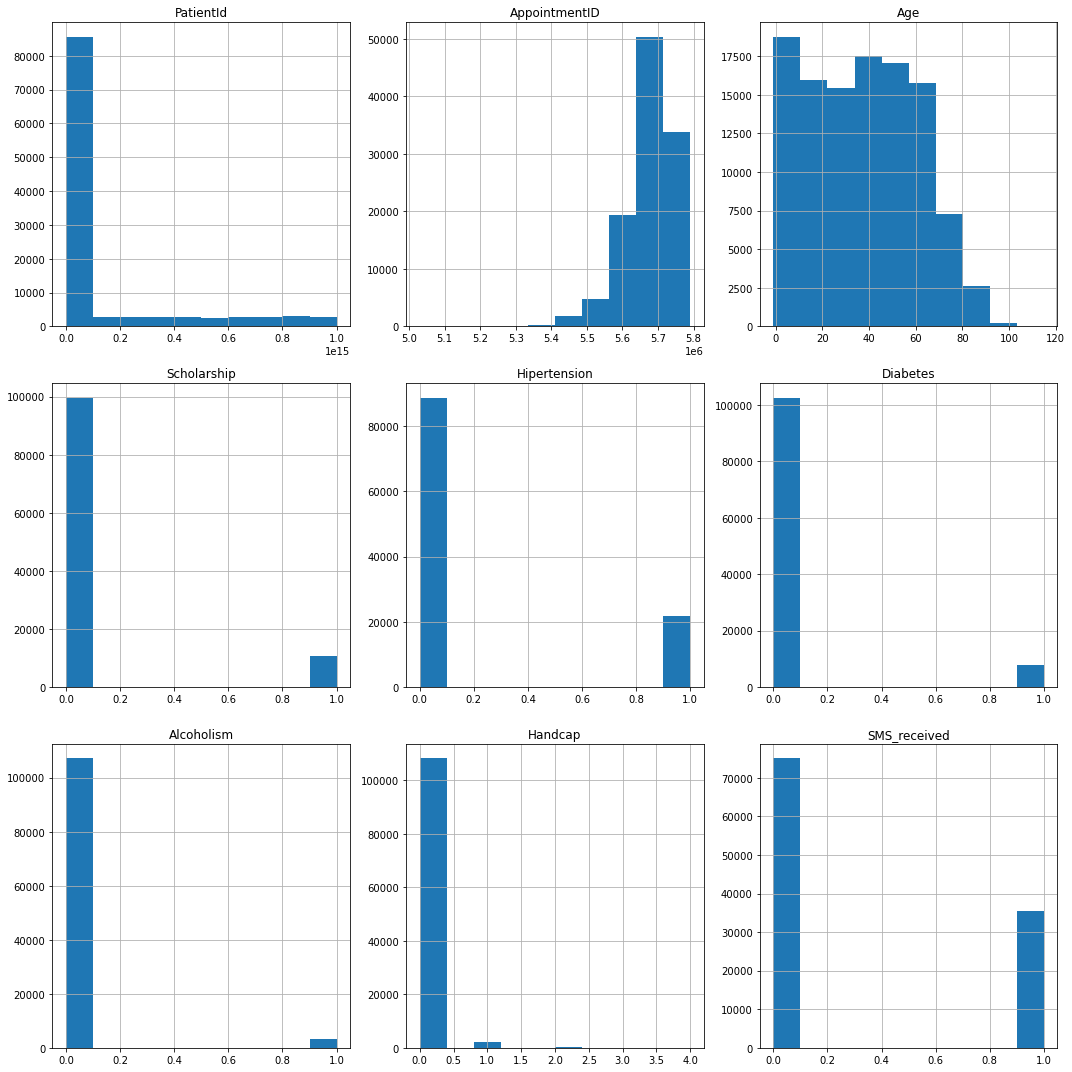

In [19]:
df.hist(figsize=(15,15));
plt.tight_layout()

- Age include more young patients
- A small percentage of patients suffer from diabetes, high blood pressure , alcohol addiction and Handcap
- SMS have been sent to more than 30% of cases

### Data Cleaning

- Edit the "No-show" Column to be in Positive form instead of Negativity

- 0 will mean that patient didn't come to his appointement.
- 1 will mean that patient came to his appointment.

- Rename the column No_show into Show_up

In [29]:
df['No-show'].replace({'Yes':0 , 'No':1} , inplace = True)

In [31]:
df.rename(columns = {'No-show' : 'Show_up'} , inplace = True)

In [34]:
df.Show_up.dtypes

dtype('int64')


- Edit the "ScheduledDay", and "AppointmentDay" Columns' Datatype to be Datetime

In [37]:
df['ScheduledDay']   = pd.to_datetime(df['ScheduledDay'])

In [38]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

- Edit the "PatientId", "AppointmentID" Columns' Datatype to be String

In [51]:
df['PatientId'].dtypes

dtype('O')

In [50]:
df['AppointmentID'].dtypes

dtype('O')

In [126]:
df['AppointmentID'] = df['AppointmentID'].apply('str')
#df['AppointmentID'].astype('object')

In [127]:
df['PatientId'] = df['PatientId'].apply('str')
#df['PatientId'].astype('object')

- Remove Row(s) with Negative Age Value(s):

In [83]:
sum(df['Age'] < 0)

1

In [84]:
sum(df["Age"]<0) 

1

- Let's convert them into nan then drop them

In [71]:
df['Age'] = df['Age'].replace(0,np.nan)

##### Test

In [87]:
sum(df["Age"] == 0) 

0

In [75]:
df['Age'].dropna(inplace = True)

In [77]:
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age               3539
Neighbourhood        0
Scholarship          0
Hipertension         0
Diabetes             0
Alcoholism           0
Handcap              0
SMS_received         0
Show_up              0
dtype: int64

In [80]:
df.dropna(subset = ['Age'] , inplace = True)

In [89]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up


In [ ]:
df.drop([99832],inplace = True)

## Exploratory Data Analysis

- (What is the percentage of patients who show up on their appointements vs. who don't?)

In [106]:
df.groupby('Show_up').count()["PatientId"]

Show_up
0    21680
1    85307
Name: PatientId, dtype: int64

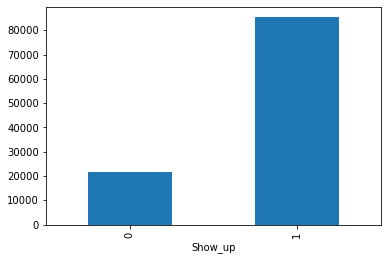

In [108]:
df.groupby('Show_up').count()["PatientId"].plot(kind = 'bar');

In [104]:
show_yes = df[df['Show_up'] == 1].count()['PatientId']
show_no  = df[df['Show_up'] == 0].count()['PatientId']

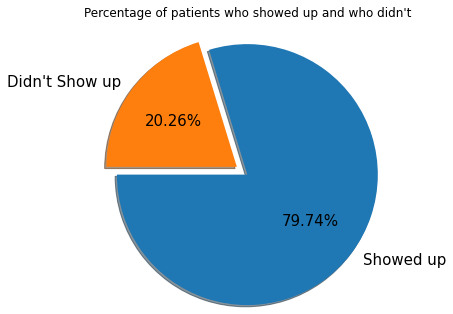

In [105]:
label_Names = ["Showed up", "Didn't Show up"]
data = [show_yes, show_no]


explode = (0, 0.15) #only explode the didn't show up slice.
plt.axis('equal'); #to keep aspect ratio equal to appear as a fine circle.
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);
#autopct to show percentage, 0.2 for two decimal place

-  (Do certain gender has more commitment to medical schedules than the other one?)

In [116]:
#df.groupby('Gender').count()
Female = df[df['Gender'] == 'F'].count()['PatientId']
Male   = df[df['Gender'] == 'M'].count()['PatientId']

In [121]:
print("The Female number is : " + str(Female) + "And the Male number is: "+str(Male))

The Female number is : 70118And the Male number is: 36869


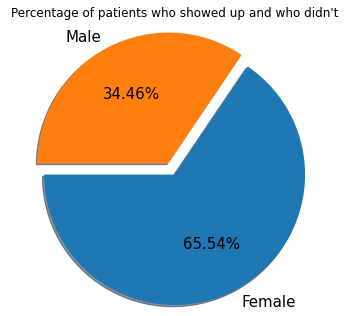

In [122]:
label_Names = ["Female", "Male"]
data = [Female, Male]


explode = (0, 0.15) #only explode the didn't show up slice.
plt.axis('equal'); #to keep aspect ratio equal to appear as a fine circle.
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);
#autopct to show percentage, 0.2 for two decimal place

-  (Is the duration between registeration and appointment affect the ability to show up ?)

In [123]:
df['Duration'] = (df['AppointmentDay'].dt.date) - (df['ScheduledDay'].dt.date)

In [134]:
df["Duration"] = df["Duration"].dt.days

In [135]:
df.groupby('Show_up').mean()['Duration']

Show_up
0    15.789299
1     8.737794
Name: Duration, dtype: float64

- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.

- Patients Who show up have an average of 8 days between registeration day and their appointments.

- As Duration increases, the ability of patients to show up on their appointments decreases.



- Do patients who recieves SMS to remind them of the appointement more likely to show up?

In [146]:
df_SMS    = df[df["SMS_received"] == 1]["Show_up"].mean()

In [147]:
df_No_SMS = df[df["SMS_received"] == 0]["Show_up"].mean()

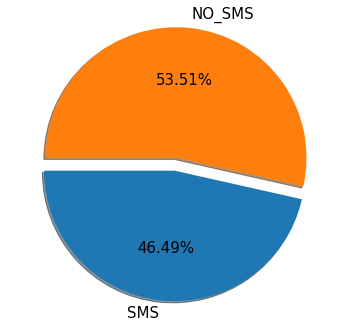

In [150]:
label_Names = ["SMS", "NO_SMS"]
data = [df_SMS, df_No_SMS]


explode = (0, 0.15) #only explode the didn't show up slice.
plt.axis('equal'); #to keep aspect ratio equal to appear as a fine circle.
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15});


- What is percentage of patients who diagnosed with Diabetes, Hipertension, Alcoholism, and Handcap?

In [151]:
all_count = 110526 #number of data records

In [156]:
diabets_count = df[df["Diabetes"]==1]["PatientId"].count()

In [161]:
#percentage of people diagnosed with Diabetes
diabetes_percent = round(diabets_count *100 / all_count , 2)

In [162]:
diabetes_percent

7.19

In [163]:
print("Percentage of patients who diagnosed with Diabetes is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Diabetes is 7.19%.


In [164]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["Hipertension"]==1]["PatientId"].count()
diabetes_percent = round(diabets_count*100/all_count,2)
print("Percentage of patients who diagnosed with Hipertension is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Hipertension is 19.72%.


In [165]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["Alcoholism"]==1]["PatientId"].count()
diabetes_percent = round(diabets_count*100/all_count,2)
print("Percentage of patients who diagnosed with Alcoholism is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Alcoholism is 3.04%.


In [166]:
#percentage of people diagnosed with Diabetes
diabets_count = df[df["Handcap"]==1]["PatientId"].count()
diabetes_percent = round(diabets_count*100/all_count,2)
print("Percentage of patients who diagnosed with Handcap is {}%.".format(diabetes_percent))

Percentage of patients who diagnosed with Handcap is 1.85%.


- Is alcohol drinking may be a cause of missing out the appointements?

In [174]:
#count of patients with alchoholism who show up
alcohol_show = df.loc[(df["Alcoholism"]==1) & (df["Show_up"]==1)]["PatientId"].count() 

In [177]:
#count of patients with alchoholism who don't show up
alcohol_No_show = df.loc[(df["Alcoholism"]==1) & (df["Show_up"]==0)]["PatientId"].count() 

In [178]:
alcohol_show_percent = round(alcohol_show*100 / all_count,2) 
alcohol_No_show_percent = round(alcohol_No_show*100 / all_count,2)

In [179]:
print("Percentage of show ups when patients have alchoholism is {}%, while not show ups is {}%.".format(alcohol_show_percent,alcohol_No_show_percent))

Percentage of show ups when patients have alchoholism is 2.43%, while not show ups is 0.61%.
